In [48]:
#Import package yang akan digunakan 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [87]:
#memasukan data csv
df = pd.read_csv('data-penyakit.csv')

In [88]:
#membaca data 5 teratas
df.head()

,diagnosis_penyakit,l,p,total,pasien_perhari,status
0,1 (J06.9) Acute upper respiratory infe...,40998,44205,85203,96.821591,1
1,2 (J00) Acute nasopharyngitis [common ...,25847,28951,54798,62.270455,1
2,3 (K30) Dyspepsia,17652,33032,50684,57.595455,1
3,4 (Z00.0) General medical examination,24391,20412,44803,50.912500,1
4,"5 (R50.9) Fever, unspecified",21463,19799,41262,46.888636,1


In [89]:
#memilih tipe data yang akan digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 6 columns):
diagnosis_penyakit    4408 non-null object
l                     4408 non-null int64
p                     4408 non-null int64
total                 4408 non-null int64
pasien_perhari        4408 non-null float64
status                4408 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 206.7+ KB


In [90]:
x_data = df.iloc[:,[3,4]].values
y_data = df.iloc[:,5].values

In [91]:
x_data

array([[8.52030000e+04, 9.68215909e+01],
       [5.47980000e+04, 6.22704545e+01],
       [5.06840000e+04, 5.75954545e+01],
       ...,
       [1.00000000e+00, 1.13636364e-03],
       [1.00000000e+00, 1.13636364e-03],
       [1.00000000e+00, 1.13636364e-03]])

In [92]:
y_data

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [93]:
#membagi data training dan data testing
x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

In [94]:
x_data_train

array([[1.00000000e+00, 1.13636364e-03],
       [2.10000000e+01, 2.38636364e-02],
       [8.00000000e+00, 9.09090909e-03],
       ...,
       [7.00000000e+00, 7.95454545e-03],
       [3.00000000e+00, 3.40909091e-03],
       [2.00000000e+00, 2.27272727e-03]])

In [95]:
x_data_test

array([[9.00000000e+00, 1.02272727e-02],
       [6.00000000e+00, 6.81818182e-03],
       [1.00000000e+00, 1.13636364e-03],
       ...,
       [2.00000000e+00, 2.27272727e-03],
       [1.00000000e+01, 1.13636364e-02],
       [2.00000000e+00, 2.27272727e-03]])

In [96]:
#mengaktifkan package dan syntax untuk mengubah skala data
from sklearn.preprocessing import StandardScaler

In [97]:
sc = StandardScaler()

In [98]:
x_data_train = sc.fit_transform(x_data_train)
x_data_test = sc.fit_transform(x_data_test)

In [99]:
x_data_test

array([[-0.08281078, -0.08281078],
       [-0.08412405, -0.08412405],
       [-0.08631283, -0.08631283],
       ...,
       [-0.08587507, -0.08587507],
       [-0.08237302, -0.08237302],
       [-0.08587507, -0.08587507]])

In [100]:
#mengaktifkan package untuk klasifikasi KNN dan inport package KNeighbors dari SKlearn
from sklearn.neighbors import KNeighborsClassifier

In [101]:
tingkat_kesalahan = []

for i in range (1,40):
    
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_data_train, y_data_train)
        pred_i = knn.predict(x_data_test)
        tingkat_kesalahan.append(np.mean(pred_i !=y_data_test))

Text(0, 0.5, 'tingkat_kesalahan')

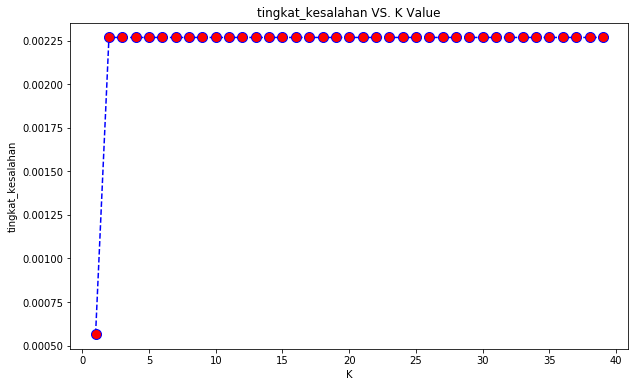

In [103]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),tingkat_kesalahan,color='blue', linestyle='dashed', marker='o'
         ,markerfacecolor='red', markersize=10)
plt.title('tingkat_kesalahan VS. K Value')
plt.xlabel('K')
plt.ylabel('tingkat_kesalahan')

In [105]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_data_train,y_data_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [132]:
pred_k = knn.predict(x_data_test)

In [133]:
pred_k

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [135]:
for i in range(10):
    print (x_data_test[i], pred_k[i])

[-0.08281078 -0.08281078] 0
[-0.08412405 -0.08412405] 0
[-0.08631283 -0.08631283] 0
[-0.08543731 -0.08543731] 0
[-0.07099137 -0.07099137] 0
[-0.08587507 -0.08587507] 0
[-0.08237302 -0.08237302] 0
[-0.08368629 -0.08368629] 0
[-0.08499956 -0.08499956] 0
[-0.07711995 -0.07711995] 0


In [136]:
from sklearn.metrics import classification_report, confusion_matrix

In [137]:
print(confusion_matrix(y_data_test, pred_k1))

[[1760    0]
 [   1    3]]


In [138]:
print(classification_report(y_data_test,pred_k1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1760
           1       1.00      0.75      0.86         4

    accuracy                           1.00      1764
   macro avg       1.00      0.88      0.93      1764
weighted avg       1.00      1.00      1.00      1764

